In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#leer los datos obtenidos de TrueFX

data_1 = pd.read_csv("../data/TrueFX/EUR-USD/EURUSD-2017-01.csv",float_precision='high',parse_dates=True
                    ,names =list(['ref','bid', 'ask']),infer_datetime_format=True,index_col=1)

data_2 = pd.read_csv("../data/TrueFX/EUR-USD/EURUSD-2017-02.csv",float_precision='high',parse_dates=True
                    ,names =list(['ref','bid', 'ask']),infer_datetime_format=True,index_col=1)

data_3 = pd.read_csv("../data/TrueFX/EUR-USD/EURUSD-2017-03.csv",float_precision='high',parse_dates=True
                    ,names =list(['ref','bid', 'ask']),infer_datetime_format=True,index_col=1)

data_4 = pd.read_csv("../data/TrueFX/EUR-USD/EURUSD-2017-04.csv",float_precision='high',parse_dates=True
                    ,names =list(['ref','bid', 'ask']),infer_datetime_format=True,index_col=1)

data_5 = pd.read_csv("../data/TrueFX/EUR-USD/EURUSD-2017-05.csv",float_precision='high',parse_dates=True
                    ,names =list(['ref','bid', 'ask']),infer_datetime_format=True,index_col=1)

data_6 = pd.read_csv("../data/TrueFX/EUR-USD/EURUSD-2017-06.csv",float_precision='high',parse_dates=True
                    ,names =list(['ref','bid', 'ask']),infer_datetime_format=True,index_col=1)

In [4]:
data_1 = data_1.drop('ref',axis=1)
data_2 = data_2.drop('ref',axis=1)
data_3 = data_3.drop('ref',axis=1)
data_4 = data_4.drop('ref',axis=1)
data_5 = data_5.drop('ref',axis=1)
data_6 = data_6.drop('ref',axis=1)

In [6]:
data_1.shape, data_2.shape, data_3.shape, data_4.shape, data_5.shape, data_6.shape

((11267961, 2),
 (8316260, 2),
 (10677118, 2),
 (7745305, 2),
 (9238859, 2),
 (9205104, 2))

In [8]:
datos = pd.concat((data_1,data_2,data_3,data_4,data_5,data_6))

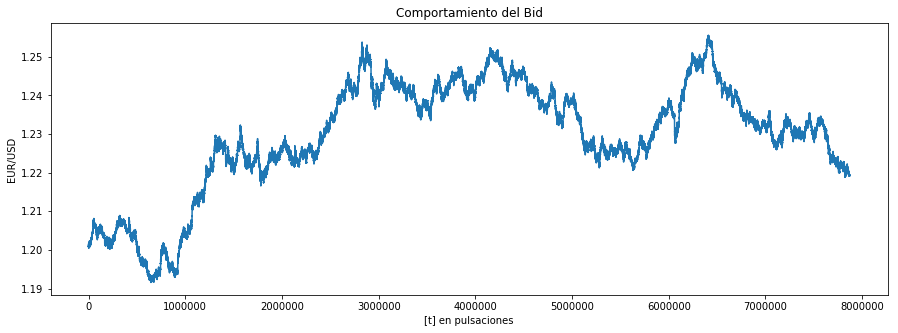

In [11]:
plt.figure(figsize=(15,5))
plt.title('Comportamiento del Bid')
plt.xlabel('[t] en pulsaciones')
plt.ylabel('EUR/USD')
plt.plot(range(datos.shape[0]),datos.iloc[:,1]);

In [12]:
#se agrupan los indices según su fecha, como hay fechas repetidas de toma la que primero está
datos = datos.groupby(datos.index).first()
datos.shape

(7864432, 2)

In [13]:
np.unique(datos.index.date)

array([datetime.date(2018, 1, 1), datetime.date(2018, 1, 2),
       datetime.date(2018, 1, 3), datetime.date(2018, 1, 4),
       datetime.date(2018, 1, 5), datetime.date(2018, 1, 7),
       datetime.date(2018, 1, 8), datetime.date(2018, 1, 9),
       datetime.date(2018, 1, 10), datetime.date(2018, 1, 11),
       datetime.date(2018, 1, 12), datetime.date(2018, 1, 14),
       datetime.date(2018, 1, 15), datetime.date(2018, 1, 16),
       datetime.date(2018, 1, 17), datetime.date(2018, 1, 18),
       datetime.date(2018, 1, 19), datetime.date(2018, 1, 21),
       datetime.date(2018, 1, 22), datetime.date(2018, 1, 23),
       datetime.date(2018, 1, 24), datetime.date(2018, 1, 25),
       datetime.date(2018, 1, 26), datetime.date(2018, 1, 28),
       datetime.date(2018, 1, 29), datetime.date(2018, 1, 30),
       datetime.date(2018, 1, 31), datetime.date(2018, 2, 1),
       datetime.date(2018, 2, 2), datetime.date(2018, 2, 4),
       datetime.date(2018, 2, 5), datetime.date(2018, 2, 6),
     

In [14]:
datos['2018-2-11']

,bid,ask
2018-02-11 22:01:00.272,1.22408,1.22509
2018-02-11 22:01:00.920,1.22418,1.22499
2018-02-11 22:01:04.170,1.22443,1.22464
2018-02-11 22:01:06.115,1.22442,1.22456
2018-02-11 22:01:09.082,1.22443,1.22457
2018-02-11 22:01:09.831,1.22441,1.22455
2018-02-11 22:01:19.835,1.22411,1.22445
2018-02-11 22:01:19.893,1.22408,1.22445
2018-02-11 22:01:21.155,1.22414,1.22445
2018-02-11 22:01:21.156,1.22414,1.22439


In [15]:
pd.Timedelta(hours=23,minutes=59,seconds=59) - pd.Timedelta(hours=22,minutes=1,seconds=56)

Timedelta('0 days 01:58:03')

In [16]:
#para correr los dias, quedan 5 bussines day
datos.index = datos.index + pd.Timedelta(hours=1, minutes=59, seconds=0)

In [19]:
np.unique(datos.index.date)

array([datetime.date(2018, 1, 2), datetime.date(2018, 1, 3),
       datetime.date(2018, 1, 4), datetime.date(2018, 1, 5),
       datetime.date(2018, 1, 8), datetime.date(2018, 1, 9),
       datetime.date(2018, 1, 10), datetime.date(2018, 1, 11),
       datetime.date(2018, 1, 12), datetime.date(2018, 1, 15),
       datetime.date(2018, 1, 16), datetime.date(2018, 1, 17),
       datetime.date(2018, 1, 18), datetime.date(2018, 1, 19),
       datetime.date(2018, 1, 22), datetime.date(2018, 1, 23),
       datetime.date(2018, 1, 24), datetime.date(2018, 1, 25),
       datetime.date(2018, 1, 26), datetime.date(2018, 1, 29),
       datetime.date(2018, 1, 30), datetime.date(2018, 1, 31),
       datetime.date(2018, 2, 1), datetime.date(2018, 2, 2),
       datetime.date(2018, 2, 5), datetime.date(2018, 2, 6),
       datetime.date(2018, 2, 7), datetime.date(2018, 2, 8),
       datetime.date(2018, 2, 9), datetime.date(2018, 2, 12),
       datetime.date(2018, 2, 13), datetime.date(2018, 2, 14),
     

In [11]:
datos.head()

,bid,ask
2018-02-01 01:59:00.125,1.24171,1.24173
2018-02-01 01:59:00.262,1.24172,1.24173
2018-02-01 01:59:00.695,1.24172,1.24175
2018-02-01 01:59:00.838,1.24173,1.24178
2018-02-01 01:59:00.848,1.24174,1.24177


In [ ]:
datos.resample('10T').last

In [ ]:
datos.resample('10T').last

In [ ]:
datos.resample().last

In [20]:
#se muestrean en intervalos de 10s
data = datos.resample('5T', loffset='5T').last().dropna() #se coge el último valor de muestreo de los 10s
print(data.shape)
data.head()

(12120, 2)


,bid,ask
2018-01-02 00:05:00,1.20030,1.20115
2018-01-02 00:10:00,1.20078,1.20123
2018-01-02 00:15:00,1.20032,1.20094
2018-01-02 00:20:00,1.20051,1.20086
2018-01-02 00:25:00,1.20048,1.20083


In [21]:
ohlc = datos.bid.resample('5T', loffset='5T').ohlc().dropna()
print(ohlc.shape)
ohlc.head()

(12120, 4)


,open,high,low,close
2018-01-02 00:05:00,1.20094,1.20094,1.20011,1.20030
2018-01-02 00:10:00,1.20030,1.20098,1.20011,1.20078
2018-01-02 00:15:00,1.20073,1.20097,1.20032,1.20032
2018-01-02 00:20:00,1.20030,1.20057,1.20025,1.20051
2018-01-02 00:25:00,1.20052,1.20053,1.20048,1.20048


In [36]:
%run ../code/EUtilities.py
EU = EUtilities()

In [22]:
ohlc['ask'] = data.ask

In [23]:
ohlc.head()

,open,high,low,close,ask
2018-01-02 00:05:00,1.20094,1.20094,1.20011,1.20030,1.20115
2018-01-02 00:10:00,1.20030,1.20098,1.20011,1.20078,1.20123
2018-01-02 00:15:00,1.20073,1.20097,1.20032,1.20032,1.20094
2018-01-02 00:20:00,1.20030,1.20057,1.20025,1.20051,1.20086
2018-01-02 00:25:00,1.20052,1.20053,1.20048,1.20048,1.20083


In [24]:
ohlc.columns = ['open', 'high', 'low', 'bid', 'ask']

In [25]:
ohlc.head()

,open,high,low,bid,ask
2018-01-02 00:05:00,1.20094,1.20094,1.20011,1.20030,1.20115
2018-01-02 00:10:00,1.20030,1.20098,1.20011,1.20078,1.20123
2018-01-02 00:15:00,1.20073,1.20097,1.20032,1.20032,1.20094
2018-01-02 00:20:00,1.20030,1.20057,1.20025,1.20051,1.20086
2018-01-02 00:25:00,1.20052,1.20053,1.20048,1.20048,1.20083


In [26]:
sum(ohlc.index==data.index)

12120

In [27]:
#guardar el data set pre-procesado
ohlc.to_csv('../data/TrueFX/EUR-USD/datos_procesados_OHLC_5T_EURUSD-2018-01_2018-02.csv')

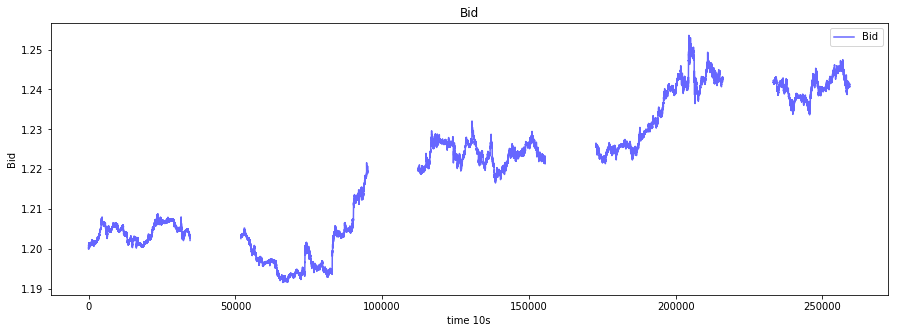

In [16]:
plt.figure(figsize=(15,5))
plt.title('Bid')
plt.xlabel('time 10s')
plt.ylabel('Bid')
plt.plot(np.arange(datos.shape[0]), datos.iloc[:,0],color='blue',alpha=0.6, label='Bid')
plt.legend();

In [17]:
print('datos nan')
print('------------')
print(np.sum(pd.isnull(datos)*1))

datos nan
------------
bid    75677
ask    75677
dtype: int64


In [18]:
datos = datos.dropna() #se eliminan los nan
print(datos.shape)

(183535, 2)


In [19]:
#guardar el data set pre-procesado
datos.to_csv('../data/TrueFX/EUR-USD/datos_procesados_EURUSD-2018-01.csv')

In [ ]:
k = datos.groupby(datos.index).count()
print (k.shape)
k.bid.value_counts().
